# Noise Reduction Tests

Just some tests to ensure the following:

1. Noise is reduced
2. Exoplanets are gone

In [3]:
import sys, os

# Getting the module
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# The important imports
from kepler.models.noise import removeNoise
import lightkurve as lk, matplotlib.pyplot as plt

# Cannot forget the inline
%matplotlib inline

# Load extensions
%load_ext autoreload
%autoreload 2

In [6]:
# Test Function

def noiseTest(name):
    tpf = lk.search_targetpixelfile(name)[:2].download_all()

    lk.search_lightcurve(name).download_all()[:2].stitch().plot()
    plt.gca().set_title("Before Noise Reduction")
    plt.gca().legend().remove()
    
    removeNoise(tpf, "Kepler").plot()
    plt.gca().legend().remove()
    plt.gca().set_title("After Noise Reduction")

## <u>The table of tests</u>

### Binary Systems Tests

- [Test 1 - KIC 3863594](#kic-3863594)
- [Test 1 - KIC 10417986](#kic-10417986)

### Exoplanet Filter Tests
- [Test 1 - Kepler 1b](#kepler-1b)
- [Test 2 - Kepler 6b](#kepler-6b)

## KIC 3863594

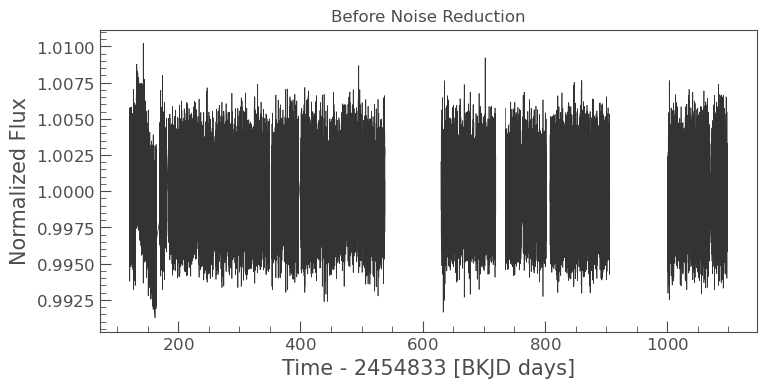

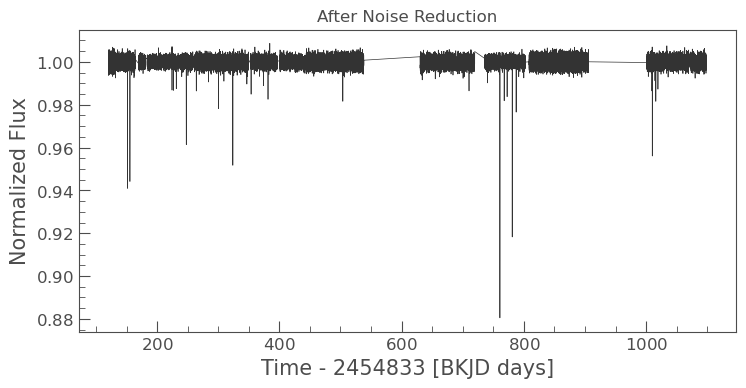

In [11]:
noiseTest("KIC 3863594")

## KIC 10417986

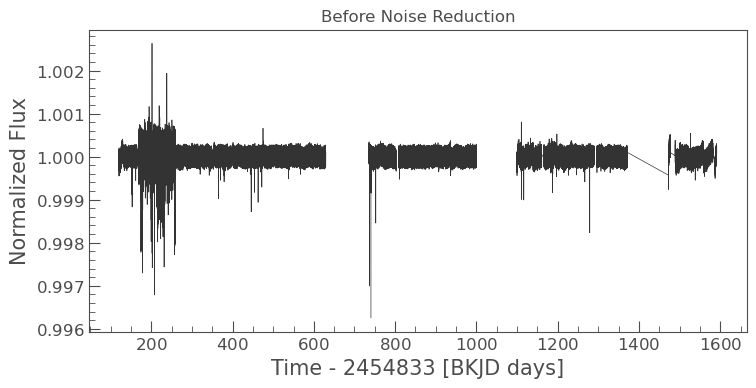

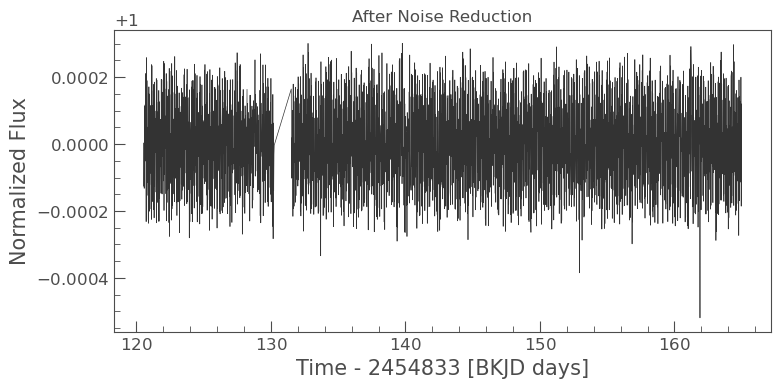

In [11]:
noiseTest("KIC 10417986")

## Kepler 1

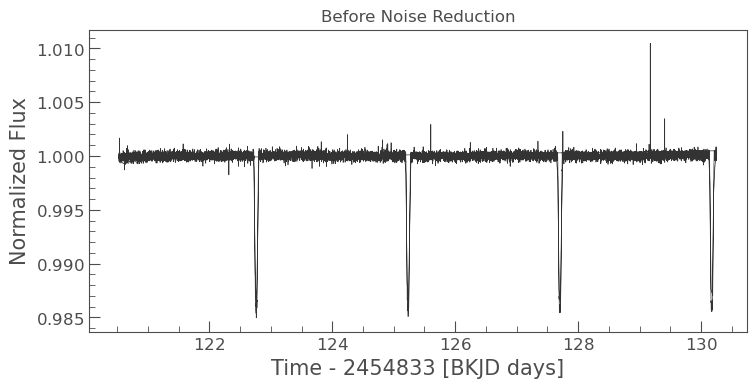

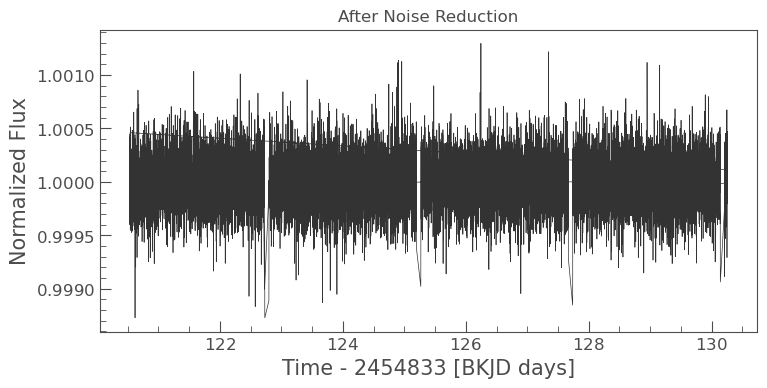

In [7]:
noiseTest("Kepler 1")

## Kepler 6

In [ ]:
noiseTest("Kepler 5")